In [1]:
from Scripts.tagger import generateTags
from Scripts.evaluator import eval
from Scripts.evaluator_v2 import eval_v2
from Scripts.plotting import plot_result
from Scripts.toolOverlap import getOverlap

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Stop warnings
import warnings as w
w.simplefilter(action='ignore',category=FutureWarning)

# **1. Git Labled DS**
* Call generateTags method to git the labeled DS as follow: generateTags('Tool Name',reportSource)
* reportSource is an integer number 0 or 1.
    - 0: Tool is used directly.
    - 1: Smartbugs framework is used to run the tool.
---

## **1.1 MAIAN-based Labeled DS**
---

In [3]:
MAIANDS =pd.DataFrame(generateTags('MAIAN',1))
MAIANDS

/Users/shikahjs/Documents/MyFiles/PhDwork/MultiTagging/Scripts/reportParser.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reportsSubDF['findings'] = reportsSubDF['findings'].str.replace('{','')
/Users/shikahjs/Documents/MyFiles/PhDwork/MultiTagging/Scripts/reportParser.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reportsSubDF['findings'] = reportsSubDF['findings'].str.replace('}','')
/Users/shikahjs/Documents/MyFiles/PhDwork/MultiTagging/Scripts/reportParser.py:125: SettingWithCopyWarning: 

MAIAN tags have been extracted successfully


,contractAddress,MAIAN_Labels,MAIAN_AnalysisTime,MAIAN_SWC_Code,MAIAN_SWC_Title,MAIAN_DASP_Rank,MAIAN_DASP_Title
0,002d5f79eff9f8d6d47a61fdaf5bf0c6,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",171.614084,[],[],[],[]
1,003c84ce2828441c5cf062c642d5492c,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",36.482624,[],[],[],[]
2,007c010f1192c459d19859ee01c41a34,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",126.963233,[],[],[],[]
3,00805ffc6f3b3ead5a87d50efd5ac2be,safe,32.757294,[],[],[],[]
4,008ee0364adf0932325253f494e9851b,"[Ether_leak_verified, No_Ether_lock_Ether_refu...",51.504314,[105.0],[Unprotected Ether Withdrawal],[2.0],[Access Control]
...,...,...,...,...,...,...,...
2516,ffb80f16332c0d6d30c4b5288b11be77,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",117.751608,[],[],[],[]
2517,ffe71a13007dd42188e6b7bb58462db3,safe,51.640797,[],[],[],[]
2518,ffeac25177f5c45eaac5cc835aff448e,"[Ether_leak, Not_destructible_no_self_destruct]",33.088611,[105.0],[Unprotected Ether Withdrawal],[2.0],[Access Control]
2519,fff46ce83645621861027fc94593e924,"[Ether_lock_Ether_accepted_without_send, No_Et...",47.123997,[132.0],[Unexpected Ether balance],[5.0],[DoS]


## **1.2. Mythril-based Labeled DS**
---

In [4]:
MythrilDS =pd.DataFrame(generateTags('Mythril',0))
MythrilDS

Mythril tags have been extracted successfully


,contractAddress,Mythril_Labels,Mythril_AnalysisTime,Mythril_SWC_Code,Mythril_SWC_Title,Mythril_DASP_Rank,Mythril_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,safe,10.903264984,[],[],[],[]
1,dde77fad873fc09aca4825971a6bf4ab,safe,7.052574578,[],[],[],[]
2,4c7eda457bb013264b3a749886513cbf,safe,3.331084249,[],[],[],[]
3,0d379be1f89da0c9303fb0bf0000422d,safe,1.727519934,[],[],[],[]
4,177cc199d3f91975d6ef41a0bdc10092,safe,1.486661684,[],[],[],[]
...,...,...,...,...,...,...,...
2541,d7d0302d58b33b4ac6d5f148b03b19d4,safe,1.626512448,[],[],[],[]
2542,d1cb4dd66663151973e7194ed24db0d7,safe,1.018089167,[],[],[],[]
2543,31eeb099e77105315e7837c7b9296a18,safe,1.751324809,[],[],[],[]
2544,30b5b6a7814903c04b286d932964be3d,safe,2.524967813,[],[],[],[]


## **1.3. Semgrep-based Labeled DS**
---

In [5]:
SemgrepDS =pd.DataFrame(generateTags('Semgrep',1))
SemgrepDS

/Users/shikahjs/Documents/MyFiles/PhDwork/MultiTagging/Scripts/reportParser.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reportsSubDF['findings'] = reportsSubDF['findings'].str.replace('{','')
/Users/shikahjs/Documents/MyFiles/PhDwork/MultiTagging/Scripts/reportParser.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reportsSubDF['findings'] = reportsSubDF['findings'].str.replace('}','')
/Users/shikahjs/Documents/MyFiles/PhDwork/MultiTagging/Scripts/reportParser.py:125: SettingWithCopyWarning: 

Semgrep tags have been extracted successfully


,contractAddress,Semgrep_Labels,Semgrep_AnalysisTime,Semgrep_SWC_Code,Semgrep_SWC_Title,Semgrep_DASP_Rank,Semgrep_DASP_Title
0,002d5f79eff9f8d6d47a61fdaf5bf0c6,"[init_variables_with_default_value, use_ownabl...",1.974213,[],[],[10.0],[Unknown Unknowns]
1,003c84ce2828441c5cf062c642d5492c,"[array_length_outside_loop, inefficient_state_...",1.920049,[129.0],[Typographical Error],[10.0],[Unknown Unknowns]
2,007c010f1192c459d19859ee01c41a34,[use_ownable2step],1.900813,[],[],[],[]
3,00805ffc6f3b3ead5a87d50efd5ac2be,"[inefficient_state_variable_increment, use_nes...",1.977787,[129.0],[Typographical Error],[10.0],[Unknown Unknowns]
4,008ee0364adf0932325253f494e9851b,"[init_variables_with_default_value, use_nested...",1.942614,[],[],[10.0],[Unknown Unknowns]
...,...,...,...,...,...,...,...
2517,ffb80f16332c0d6d30c4b5288b11be77,[use_ownable2step],1.942096,[],[],[],[]
2518,ffe71a13007dd42188e6b7bb58462db3,"[inefficient_state_variable_increment, state_v...",1.827747,[129.0],[Typographical Error],[10.0],[Unknown Unknowns]
2519,ffeac25177f5c45eaac5cc835aff448e,[use_nested_if],2.008317,[],[],[10.0],[Unknown Unknowns]
2520,fff46ce83645621861027fc94593e924,safe,1.994844,[],[],[],[]


## **1.4. Slither-based Labeled DS**
---

In [6]:
SlitherDS =pd.DataFrame(generateTags('Slither',0))
SlitherDS

Slither tags have been extracted successfully


,contractAddress,Slither_Labels,Slither_AnalysisTime,Slither_SWC_Code,Slither_SWC_Title,Slither_DASP_Rank,Slither_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,"[uninitialized-state, events-maths, solc-versi...",.451545109,"[109.0, 102.0, 107.0]","[Uninitialized Storage Pointer, Outdated Compi...","[10.0, 1.0]","[Unknown Unknowns, Reentrancy]"
1,dde77fad873fc09aca4825971a6bf4ab,"[arbitrary-send-eth, reentrancy-eth, solc-vers...",.420815448,"[105.0, 107.0, 102.0, 104.0]","[Unprotected Ether Withdrawal, Reentrancy, Out...","[2.0, 1.0, 10.0, 4.0]","[Access Control, Reentrancy, Unknown Unknowns,..."
2,4c7eda457bb013264b3a749886513cbf,"[arbitrary-send-erc20, arbitrary-send-eth, eve...",.321185925,"[105.0, 113.0, 102.0, 107.0]","[Unprotected Ether Withdrawal, DoS with Failed...","[2.0, 5.0, 10.0, 1.0]","[Access Control, DoS, Unknown Unknowns, Reentr..."
3,0d379be1f89da0c9303fb0bf0000422d,"[solc-version, naming-convention]",.281484293,[102.0],[Outdated Compiler Version],[10.0],[Unknown Unknowns]
4,177cc199d3f91975d6ef41a0bdc10092,"[deprecated-standards, solc-version, low-level...",.332860281,"[111.0, 102.0, 104.0, 131.0]","[Use of Deprecated Solidity Functions, Outdate...","[10.0, 4.0]","[Unknown Unknowns, Unchecked Return Values For..."
...,...,...,...,...,...,...,...
2320,d7d0302d58b33b4ac6d5f148b03b19d4,[solc-version],.285438490,[102.0],[Outdated Compiler Version],[10.0],[Unknown Unknowns]
2321,d1cb4dd66663151973e7194ed24db0d7,"[missing-zero-check, deprecated-standards, sol...",.291304560,"[105.0, 111.0, 102.0]","[Unprotected Ether Withdrawal, Use of Deprecat...","[2.0, 10.0]","[Access Control, Unknown Unknowns]"
2322,31eeb099e77105315e7837c7b9296a18,"[shadowing-state, timestamp, solc-version, ree...",.300851181,"[119.0, 116.0, 102.0, 107.0]","[Shadowing State Variables, Block values as a ...","[10.0, 8.0, 1.0]","[Unknown Unknowns, Time manipulation, Reentrancy]"
2323,30b5b6a7814903c04b286d932964be3d,"[erc20-interface, reentrancy-events, timestamp...",.340238834,"[107.0, 116.0, 135.0, 102.0, 131.0]","[Reentrancy, Block values as a proxy for time,...","[1.0, 8.0, 10.0]","[Reentrancy, Time manipulation, Unknown Unknowns]"


## **1.5. Solhint-based Labeled DS**
---

In [3]:
SolhintDS =pd.DataFrame(generateTags('Solhint',0))
SolhintDS

Solhint tags have been extracted successfully


,contractAddress,Solhint_Labels,Solhint_AnalysisTime,Solhint_SWC_Code,Solhint_SWC_Title,Solhint_DASP_Rank,Solhint_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,"[compiler-version, contract-name-camelcase, ma...",.794517290,"[102.0, 108.0, 107.0]","[Outdated Compiler Version, State Variable Def...","[10, 1]","[Unknown Unknowns, Reentrancy]"
1,dde77fad873fc09aca4825971a6bf4ab,"[compiler-version, contract-name-camelcase, ma...",.704679352,"[102.0, 108.0, 107.0, 104.0]","[Outdated Compiler Version, State Variable Def...","[10, 1, 4]","[Unknown Unknowns, Reentrancy, Unchecked Retur..."
2,4c7eda457bb013264b3a749886513cbf,"[one-contract-per-file, compiler-version, cont...",.697282162,"[102.0, 104.0]","[Outdated Compiler Version, Unchecked Call Ret...","[10, 5, 4]","[Unknown Unknowns, DoS, Unchecked Return Value..."
3,0d379be1f89da0c9303fb0bf0000422d,"[compiler-version, contract-name-camelcase, re...",.688934462,[102.0],[Outdated Compiler Version],[10],[Unknown Unknowns]
4,177cc199d3f91975d6ef41a0bdc10092,"[one-contract-per-file, compiler-version, func...",.689365301,"[102.0, 100.0, 108.0, 104.0]","[Outdated Compiler Version, Function Default V...","[10, 4]","[Unknown Unknowns, Unchecked Return Values For..."
...,...,...,...,...,...,...,...
2548,d7d0302d58b33b4ac6d5f148b03b19d4,"[compiler-version, explicit-types, reason-stri...",.652642626,[102.0],[Outdated Compiler Version],[10],[Unknown Unknowns]
2549,d1cb4dd66663151973e7194ed24db0d7,"[compiler-version, explicit-types, avoid-throw...",.669446569,"[102.0, 100.0, 104.0]","[Outdated Compiler Version, Function Default V...","[10, 4]","[Unknown Unknowns, Unchecked Return Values For..."
2550,31eeb099e77105315e7837c7b9296a18,"[one-contract-per-file, compiler-version, func...",.679187970,"[102.0, 100.0, 116.0, 107.0]","[Outdated Compiler Version, Function Default V...","[10, 5, 8, 1]","[Unknown Unknowns, DoS, Time manipulation, Ree..."
2551,30b5b6a7814903c04b286d932964be3d,"[one-contract-per-file, compiler-version, cont...",.705358622,"[102.0, 100.0, 108.0, 116.0, 107.0, 113.0]","[Outdated Compiler Version, Function Default V...","[10, 8, 1, 5]","[Unknown Unknowns, Time manipulation, Reentran..."


## **1.6. VeriSmart-based Labeled DS**
---

In [7]:
VeriSmartDS =pd.DataFrame(generateTags('VeriSmart',0))
VeriSmartDS

VeriSmart tags have been extracted successfully


,contractAddress,VeriSmart_Labels,VeriSmart_AnalysisTime,VeriSmart_SWC_Code,VeriSmart_SWC_Title,VeriSmart_DASP_Rank,VeriSmart_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,"[IO, ETH_LEAK]",300.570048,"[101.0, 105.0]","[Integer Overflow and Underflow, Unprotected E...","[3, 2]","[Arithmetic Issues, Access Control]"
1,dde77fad873fc09aca4825971a6bf4ab,"[IO, ETH_LEAK]",302.114627,"[101.0, 105.0]","[Integer Overflow and Underflow, Unprotected E...","[3, 2]","[Arithmetic Issues, Access Control]"
2,4c7eda457bb013264b3a749886513cbf,[error],0.,[error],[error],[error],[error]
3,0d379be1f89da0c9303fb0bf0000422d,[ETH_LEAK],2.439025,[105.0],[Unprotected Ether Withdrawal],[2],[Access Control]
4,177cc199d3f91975d6ef41a0bdc10092,[error],0.,[error],[error],[error],[error]
...,...,...,...,...,...,...,...
2533,d7d0302d58b33b4ac6d5f148b03b19d4,[IO],0.060747,[101.0],[Integer Overflow and Underflow],[3],[Arithmetic Issues]
2534,d1cb4dd66663151973e7194ed24db0d7,[error],0.,[error],[error],[error],[error]
2535,31eeb099e77105315e7837c7b9296a18,[IO],65.365674,[101.0],[Integer Overflow and Underflow],[3],[Arithmetic Issues]
2536,30b5b6a7814903c04b286d932964be3d,"[IO, ETH_LEAK]",301.191178,"[101.0, 105.0]","[Integer Overflow and Underflow, Unprotected E...","[3, 2]","[Arithmetic Issues, Access Control]"


# **2. Analysis Tools Evaluation (Exp1)**
* **Selected Benchmarks:**
    *   **eThor:** Manually assessed.
    *   **NotSoSmartC:** Collection of mishaps for educational purposes.
    *   **SBcurated:** SCs were picked from other collections and manually assessed.
    *   **SolidiFI:** Injecting 7 types of bugs.
---

## **2.1. Base Data: eThor.csv**
---

### **2.1.1. MAIAN**
---

In [4]:
DF = eval_v2('MAIAN','eThor.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']


eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,False,0,0,0,9,0.0,NaN
1,eThor.csv,Access Control,False,True,0,9,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,False,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,False,0,9,0,0,NaN,NaN
4,eThor.csv,DoS,False,True,0,8,1,0,NaN,0.0
5,eThor.csv,Bad Randomness,False,False,0,9,0,0,NaN,NaN
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,False,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


### **2.1.2. Mythril**
---

In [5]:
DF = eval_v2('Mythril','eThor.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,0,0,0,9,0.0,NaN
1,eThor.csv,Access Control,False,True,0,9,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,True,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,9,0,0,NaN,NaN
4,eThor.csv,DoS,False,True,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,9,0,0,NaN,NaN
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


### **2.1.3. Semgrep**
---

In [6]:
DF = eval_v2('Semgrep','eThor.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,0,0,0,9,0.0,NaN
1,eThor.csv,Access Control,False,True,0,9,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,True,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,False,0,9,0,0,NaN,NaN
4,eThor.csv,DoS,False,False,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,9,0,0,NaN,NaN
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,False,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


### **2.1.4. Slither**
---

In [7]:
#new results
DF = eval_v2('Slither','eThor.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,1,0,0,8,0.111111,1.0
1,eThor.csv,Access Control,False,True,0,5,4,0,NaN,0.0
2,eThor.csv,Arithmetic,False,True,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,9,0,0,NaN,NaN
4,eThor.csv,DoS,False,True,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,8,1,0,NaN,0.0
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


In [8]:
DF = eval_v2('Slither','eThor.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,1,0,0,8,0.111111,1.0
1,eThor.csv,Access Control,False,True,0,5,4,0,NaN,0.0
2,eThor.csv,Arithmetic,False,True,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,9,0,0,NaN,NaN
4,eThor.csv,DoS,False,True,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,8,1,0,NaN,0.0
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


### **2.1.5. Solhint**
---

In [9]:
#New data
DF = eval_v2('Solhint','eThor.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,1,0,0,8,0.111111,1.0
1,eThor.csv,Access Control,False,True,0,9,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,False,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,7,2,0,NaN,0.0
4,eThor.csv,DoS,False,True,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,8,1,0,NaN,0.0
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


In [10]:
DF = eval_v2('Solhint','eThor.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,1,0,0,8,0.111111,1.0
1,eThor.csv,Access Control,False,True,0,9,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,False,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,7,2,0,NaN,0.0
4,eThor.csv,DoS,False,True,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,8,1,0,NaN,0.0
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


### **2.1.6. VeriSmart**
---

In [11]:
DF = eval_v2('VeriSmart','eThor.csv')
DF

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,False,0,0,0,0,NaN,NaN
1,eThor.csv,Access Control,False,True,0,0,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,True,0,0,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,False,0,0,0,0,NaN,NaN
4,eThor.csv,DoS,False,False,0,0,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,False,0,0,0,0,NaN,NaN
6,eThor.csv,Front-Running,False,False,0,0,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,False,0,0,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,0,0,0,NaN,NaN


### **2.1.7. Vote**
---

In [12]:
eval_v2('vote_Threshold','eThor.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,1,0,0,8,0.111111,1.0
1,eThor.csv,Access Control,False,True,0,9,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,True,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,9,0,0,NaN,NaN
4,eThor.csv,DoS,False,True,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,8,1,0,NaN,0.0
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


In [14]:
eval_v2('vote_Majority','eThor.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,0,0,0,9,0.0,NaN
1,eThor.csv,Access Control,False,True,0,9,0,0,NaN,NaN
2,eThor.csv,Arithmetic,False,True,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,9,0,0,NaN,NaN
4,eThor.csv,DoS,False,True,0,9,0,0,NaN,NaN
5,eThor.csv,Bad Randomness,False,True,0,9,0,0,NaN,NaN
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


In [15]:
eval_v2('vote_AtLeast','eThor.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
eThor contains 1 vulnerability types from DASP Top 10, which are:
 ['Reentrancy']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,eThor.csv,Reentrancy,True,True,1,0,0,8,0.111111,1.0
1,eThor.csv,Access Control,False,True,0,5,4,0,NaN,0.0
2,eThor.csv,Arithmetic,False,True,0,9,0,0,NaN,NaN
3,eThor.csv,Unchecked Return Values,False,True,0,7,2,0,NaN,0.0
4,eThor.csv,DoS,False,True,0,8,1,0,NaN,0.0
5,eThor.csv,Bad Randomness,False,True,0,8,1,0,NaN,0.0
6,eThor.csv,Front-Running,False,False,0,9,0,0,NaN,NaN
7,eThor.csv,Time manipulation,False,True,0,9,0,0,NaN,NaN
8,eThor.csv,Short Address Attack,False,False,0,9,0,0,NaN,NaN


## **2.2. Base Data: NotSoSmartC.csv**
---

### **2.2.1. MAIAN**
---

In [16]:
DF = eval_v2('MAIAN','NotSoSmartC.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']


NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,False,0,11,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,1,9,1,2,0.333333,0.5
2,NotSoSmartC.csv,Arithmetic,False,False,0,13,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,False,0,12,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,True,0,11,1,1,0.0,0.0
5,NotSoSmartC.csv,Bad Randomness,False,False,0,13,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,12,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,False,0,13,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,13,0,0,NaN,NaN


### **2.2.2. Mythril**
---

In [17]:
DF = eval_v2('Mythril','NotSoSmartC.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,15,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,13,0,4,0.0,NaN
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,16,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,True,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,17,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


### **2.2.3. Semgrep**
---

In [18]:
DF = eval_v2('Semgrep','NotSoSmartC.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,15,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,13,0,4,0.0,NaN
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,False,0,16,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,False,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,False,0,17,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


### **2.2.4. Slither**
---

In [19]:
#New results
DF = eval_v2('Slither','NotSoSmartC.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,2,5,6,0,1.0,0.25
1,NotSoSmartC.csv,Access Control,True,True,3,4,5,1,0.75,0.375
2,NotSoSmartC.csv,Arithmetic,False,True,0,11,2,0,NaN,0.0
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,8,4,1,0.0,0.0
4,NotSoSmartC.csv,DoS,True,True,0,12,0,1,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,13,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,12,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,10,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,13,0,0,NaN,NaN


In [20]:
DF = eval_v2('Slither','NotSoSmartC.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,2,5,6,0,1.0,0.25
1,NotSoSmartC.csv,Access Control,True,True,3,4,5,1,0.75,0.375
2,NotSoSmartC.csv,Arithmetic,False,True,0,11,2,0,NaN,0.0
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,8,4,1,0.0,0.0
4,NotSoSmartC.csv,DoS,True,True,0,12,0,1,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,13,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,12,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,10,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,13,0,0,NaN,NaN


### **2.2.5. Solhint**
---

In [21]:
#New results
DF = eval_v2('Solhint','NotSoSmartC.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,10,5,2,0.0,0.0
1,NotSoSmartC.csv,Access Control,True,True,1,12,1,3,0.25,0.5
2,NotSoSmartC.csv,Arithmetic,False,False,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,1,12,4,0,1.0,0.2
4,NotSoSmartC.csv,DoS,True,True,0,12,2,3,0.0,0.0
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


In [22]:
DF = eval_v2('Solhint','NotSoSmartC.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,10,5,2,0.0,0.0
1,NotSoSmartC.csv,Access Control,True,True,1,12,1,3,0.25,0.5
2,NotSoSmartC.csv,Arithmetic,False,False,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,1,12,4,0,1.0,0.2
4,NotSoSmartC.csv,DoS,True,True,0,12,2,3,0.0,0.0
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


### **2.2.6. VeriSmart**
---

In [23]:
DF = eval_v2('VeriSmart','NotSoSmartC.csv')
DF

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,False,0,6,0,1,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,3,4,0,NaN,0.0
2,NotSoSmartC.csv,Arithmetic,False,True,0,3,4,0,NaN,0.0
3,NotSoSmartC.csv,Unchecked Return Values,True,False,0,6,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,False,0,7,0,0,NaN,NaN
5,NotSoSmartC.csv,Bad Randomness,False,False,0,7,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,6,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,False,0,7,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,7,0,0,NaN,NaN


### **2.2.7. Vote**
---

In [24]:
eval_v2('vote_Threshold','NotSoSmartC.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,11,4,2,0.0,0.0
1,NotSoSmartC.csv,Access Control,True,True,1,12,1,3,0.25,0.5
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,13,3,1,0.0,0.0
4,NotSoSmartC.csv,DoS,True,True,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


In [25]:
eval_v2('vote_Majority','NotSoSmartC.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,15,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,13,0,4,0.0,NaN
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,13,3,1,0.0,0.0
4,NotSoSmartC.csv,DoS,True,True,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


In [26]:
eval_v2('vote_AtLeast','NotSoSmartC.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,2,8,7,0,1.0,0.222222
1,NotSoSmartC.csv,Access Control,True,True,4,7,6,0,1.0,0.4
2,NotSoSmartC.csv,Arithmetic,False,True,0,13,4,0,NaN,0.0
3,NotSoSmartC.csv,Unchecked Return Values,True,True,1,11,5,0,1.0,0.166667
4,NotSoSmartC.csv,DoS,True,True,0,11,3,3,0.0,0.0
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


## **2.3. Base Data: SBcurated.csv**
---

### **2.3.1. MAIAN**
---

In [27]:
DF = eval_v2('MAIAN','SBcurated.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,False,0,80,0,15,0.0,NaN
1,SBcurated.csv,Access Control,True,True,6,81,1,7,0.461538,0.857143
2,SBcurated.csv,Arithmetic,True,False,0,82,0,13,0.0,NaN
3,SBcurated.csv,Unchecked Return Values,True,False,0,60,0,35,0.0,NaN
4,SBcurated.csv,DoS,True,True,0,90,1,4,0.0,0.0
5,SBcurated.csv,Bad Randomness,True,False,0,90,0,5,0.0,NaN
6,SBcurated.csv,Front-Running,True,False,0,91,0,4,0.0,NaN
7,SBcurated.csv,Time manipulation,True,False,0,91,0,4,0.0,NaN
8,SBcurated.csv,Short Address Attack,True,False,0,94,0,1,0.0,NaN


### **2.3.2. Mythril**
---

In [28]:
DF = eval_v2('Mythril','SBcurated.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,True,0,81,0,15,0.0,NaN
1,SBcurated.csv,Access Control,True,True,1,83,0,12,0.076923,1.0
2,SBcurated.csv,Arithmetic,True,True,0,83,0,13,0.0,NaN
3,SBcurated.csv,Unchecked Return Values,True,True,0,61,0,35,0.0,NaN
4,SBcurated.csv,DoS,True,True,0,92,0,4,0.0,NaN
5,SBcurated.csv,Bad Randomness,True,True,1,90,0,5,0.166667,1.0
6,SBcurated.csv,Front-Running,True,False,0,92,0,4,0.0,NaN
7,SBcurated.csv,Time manipulation,True,True,1,92,0,3,0.25,1.0
8,SBcurated.csv,Short Address Attack,True,False,0,95,0,1,0.0,NaN


### **2.3.3. Semgrep**
---

In [29]:
DF = eval_v2('Semgrep','SBcurated.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,True,0,81,0,15,0.0,NaN
1,SBcurated.csv,Access Control,True,True,1,83,0,12,0.076923,1.0
2,SBcurated.csv,Arithmetic,True,True,0,83,0,13,0.0,NaN
3,SBcurated.csv,Unchecked Return Values,True,False,0,61,0,35,0.0,NaN
4,SBcurated.csv,DoS,True,False,0,92,0,4,0.0,NaN
5,SBcurated.csv,Bad Randomness,True,True,0,89,1,6,0.0,0.0
6,SBcurated.csv,Front-Running,True,False,0,92,0,4,0.0,NaN
7,SBcurated.csv,Time manipulation,True,False,0,92,0,4,0.0,NaN
8,SBcurated.csv,Short Address Attack,True,False,0,95,0,1,0.0,NaN


### **2.3.4. Slither**
---

In [30]:
DF = eval_v2('Slither','SBcurated.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,True,12,58,17,0,1.0,0.413793
1,SBcurated.csv,Access Control,True,True,8,35,39,5,0.615385,0.170213
2,SBcurated.csv,Arithmetic,True,True,0,74,1,12,0.0,0.0
3,SBcurated.csv,Unchecked Return Values,True,True,29,45,11,2,0.935484,0.725
4,SBcurated.csv,DoS,True,True,2,73,10,2,0.5,0.166667
5,SBcurated.csv,Bad Randomness,True,True,1,77,5,4,0.2,0.166667
6,SBcurated.csv,Front-Running,True,False,0,83,0,4,0.0,NaN
7,SBcurated.csv,Time manipulation,True,True,4,77,6,0,1.0,0.4
8,SBcurated.csv,Short Address Attack,True,False,0,86,0,1,0.0,NaN


### **2.3.5. Solhint**
---

In [31]:
DF = eval_v2('Solhint','SBcurated.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,True,0,66,15,15,0.0,0.0
1,SBcurated.csv,Access Control,True,True,2,77,6,11,0.153846,0.25
2,SBcurated.csv,Arithmetic,True,False,0,83,0,13,0.0,NaN
3,SBcurated.csv,Unchecked Return Values,True,True,35,45,16,0,1.0,0.686275
4,SBcurated.csv,DoS,True,True,1,85,7,3,0.25,0.125
5,SBcurated.csv,Bad Randomness,True,True,3,87,3,3,0.5,0.5
6,SBcurated.csv,Front-Running,True,False,0,92,0,4,0.0,NaN
7,SBcurated.csv,Time manipulation,True,True,4,78,14,0,1.0,0.222222
8,SBcurated.csv,Short Address Attack,True,False,0,95,0,1,0.0,NaN


### **2.3.6. VeriSmart**
---

In [32]:
eval_v2('VeriSmart','SBcurated.csv')

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,False,0,61,0,10,0.0,NaN
1,SBcurated.csv,Access Control,True,True,10,46,13,2,0.833333,0.434783
2,SBcurated.csv,Arithmetic,True,True,10,38,23,0,1.0,0.30303
3,SBcurated.csv,Unchecked Return Values,True,False,0,45,0,26,0.0,NaN
4,SBcurated.csv,DoS,True,False,0,67,0,4,0.0,NaN
5,SBcurated.csv,Bad Randomness,True,False,0,67,0,4,0.0,NaN
6,SBcurated.csv,Front-Running,True,False,0,68,0,3,0.0,NaN
7,SBcurated.csv,Time manipulation,True,False,0,69,0,2,0.0,NaN
8,SBcurated.csv,Short Address Attack,True,False,0,71,0,0,NaN,NaN


### **2.3.7. Vote**
---

In [14]:
eval_v2('vote_Threshold','SBcurated.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,True,0,67,14,15,0.0,0.0
1,SBcurated.csv,Access Control,True,True,2,82,1,11,0.153846,0.666667
2,SBcurated.csv,Arithmetic,True,True,0,82,1,13,0.0,0.0
3,SBcurated.csv,Unchecked Return Values,True,True,33,47,14,2,0.942857,0.702128
4,SBcurated.csv,DoS,True,True,2,77,15,2,0.5,0.117647
5,SBcurated.csv,Bad Randomness,True,True,1,87,3,5,0.166667,0.25
6,SBcurated.csv,Front-Running,True,False,0,1,0,0,NaN,NaN
7,SBcurated.csv,Time manipulation,True,True,4,84,8,0,1.0,0.333333
8,SBcurated.csv,Short Address Attack,True,False,0,1,0,0,NaN,NaN


In [15]:
eval_v2('vote_Majority','SBcurated.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,True,0,69,12,15,0.0,0.0
1,SBcurated.csv,Access Control,True,True,2,82,1,11,0.153846,0.666667
2,SBcurated.csv,Arithmetic,True,True,0,83,0,13,0.0,NaN
3,SBcurated.csv,Unchecked Return Values,True,True,29,50,11,6,0.828571,0.725
4,SBcurated.csv,DoS,True,True,1,89,3,3,0.25,0.25
5,SBcurated.csv,Bad Randomness,True,True,0,88,2,6,0.0,0.0
6,SBcurated.csv,Front-Running,True,False,0,1,0,0,NaN,NaN
7,SBcurated.csv,Time manipulation,True,True,4,86,6,0,1.0,0.4
8,SBcurated.csv,Short Address Attack,True,False,0,1,0,0,NaN,NaN


In [16]:
eval_v2('vote_AtLeastOne','SBcurated.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SBcurated contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SBcurated.csv,Reentrancy,True,True,12,62,19,3,0.8,0.387097
1,SBcurated.csv,Access Control,True,True,13,33,50,0,1.0,0.206349
2,SBcurated.csv,Arithmetic,True,True,10,59,24,3,0.769231,0.294118
3,SBcurated.csv,Unchecked Return Values,True,True,35,45,16,0,1.0,0.686275
4,SBcurated.csv,DoS,True,True,2,76,16,2,0.5,0.111111
5,SBcurated.csv,Bad Randomness,True,True,5,84,6,1,0.833333,0.454545
6,SBcurated.csv,Front-Running,True,False,0,1,0,0,NaN,NaN
7,SBcurated.csv,Time manipulation,True,True,4,78,14,0,1.0,0.222222
8,SBcurated.csv,Short Address Attack,True,False,0,1,0,0,NaN,NaN


## **2.4. Base Data: SolidiFI.csv**
---

### **2.4.1. MAIAN**
---

In [36]:
DF = eval_v2('MAIAN','SolidiFI.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,False,0,260,0,42,0.0,NaN
1,SolidiFI.csv,Access Control,True,True,7,206,9,80,0.08046,0.4375
2,SolidiFI.csv,Arithmetic,True,False,0,255,0,47,0.0,NaN
3,SolidiFI.csv,Unchecked Return Values,True,False,0,262,0,40,0.0,NaN
4,SolidiFI.csv,DoS,False,True,0,288,14,0,NaN,0.0
5,SolidiFI.csv,Bad Randomness,False,False,0,302,0,0,NaN,NaN
6,SolidiFI.csv,Front-Running,True,False,0,263,0,39,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,False,0,255,0,47,0.0,NaN
8,SolidiFI.csv,Short Address Attack,False,False,0,302,0,0,NaN,NaN


### **2.4.2. Mythril**
---

In [37]:
DF = eval_v2('Mythril','SolidiFI.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,True,0,294,0,49,0.0,NaN
1,SolidiFI.csv,Access Control,True,True,12,245,0,86,0.122449,1.0
2,SolidiFI.csv,Arithmetic,True,True,0,294,0,49,0.0,NaN
3,SolidiFI.csv,Unchecked Return Values,True,True,0,294,0,49,0.0,NaN
4,SolidiFI.csv,DoS,False,True,0,343,0,0,NaN,NaN
5,SolidiFI.csv,Bad Randomness,False,True,0,343,0,0,NaN,NaN
6,SolidiFI.csv,Front-Running,True,False,0,294,0,49,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,True,24,287,7,25,0.489796,0.774194
8,SolidiFI.csv,Short Address Attack,False,False,0,343,0,0,NaN,NaN


### **2.4.3. Semgrep**
---

In [38]:
DF = eval_v2('Semgrep','SolidiFI.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,True,1,288,6,48,0.020408,0.142857
1,SolidiFI.csv,Access Control,True,True,0,245,0,98,0.0,NaN
2,SolidiFI.csv,Arithmetic,True,True,0,294,0,49,0.0,NaN
3,SolidiFI.csv,Unchecked Return Values,True,False,0,294,0,49,0.0,NaN
4,SolidiFI.csv,DoS,False,False,0,343,0,0,NaN,NaN
5,SolidiFI.csv,Bad Randomness,False,True,0,343,0,0,NaN,NaN
6,SolidiFI.csv,Front-Running,True,False,0,294,0,49,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,False,0,294,0,49,0.0,NaN
8,SolidiFI.csv,Short Address Attack,False,False,0,343,0,0,NaN,NaN


### **2.4.4. Slither**
---

In [39]:
DF = eval_v2('Slither','SolidiFI.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,True,40,139,117,0,1.0,0.254777
1,SolidiFI.csv,Access Control,True,True,85,46,165,0,1.0,0.34
2,SolidiFI.csv,Arithmetic,True,True,5,221,30,40,0.111111,0.142857
3,SolidiFI.csv,Unchecked Return Values,True,True,40,201,55,0,1.0,0.421053
4,SolidiFI.csv,DoS,False,True,0,240,56,0,NaN,0.0
5,SolidiFI.csv,Bad Randomness,False,True,0,251,45,0,NaN,0.0
6,SolidiFI.csv,Front-Running,True,False,0,255,0,41,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,True,45,161,90,0,1.0,0.333333
8,SolidiFI.csv,Short Address Attack,False,False,0,296,0,0,NaN,NaN


### **2.4.5. Solhint**
---

In [40]:
DF = eval_v2('Solhint','SolidiFI.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,True,49,180,114,0,1.0,0.300613
1,SolidiFI.csv,Access Control,True,True,50,240,5,48,0.510204,0.909091
2,SolidiFI.csv,Arithmetic,True,False,0,294,0,49,0.0,NaN
3,SolidiFI.csv,Unchecked Return Values,True,True,49,192,102,0,1.0,0.324503
4,SolidiFI.csv,DoS,False,True,0,329,14,0,NaN,0.0
5,SolidiFI.csv,Bad Randomness,False,True,0,343,0,0,NaN,NaN
6,SolidiFI.csv,Front-Running,True,False,0,294,0,49,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,True,49,180,114,0,1.0,0.300613
8,SolidiFI.csv,Short Address Attack,False,False,0,343,0,0,NaN,NaN


### **2.4.6. VeriSmart**
---

In [41]:
DF = eval_v2('VeriSmart','SolidiFI.csv')
DF

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,False,0,180,0,30,0.0,NaN
1,SolidiFI.csv,Access Control,True,True,60,0,150,0,1.0,0.285714
2,SolidiFI.csv,Arithmetic,True,True,30,30,150,0,1.0,0.166667
3,SolidiFI.csv,Unchecked Return Values,True,False,0,180,0,30,0.0,NaN
4,SolidiFI.csv,DoS,False,False,0,210,0,0,NaN,NaN
5,SolidiFI.csv,Bad Randomness,False,False,0,210,0,0,NaN,NaN
6,SolidiFI.csv,Front-Running,True,False,0,180,0,30,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,False,0,180,0,30,0.0,NaN
8,SolidiFI.csv,Short Address Attack,False,False,0,210,0,0,NaN,NaN


### **2.4.7. Vote**
---

In [10]:
eval_v2('vote_Threshold','SolidiFI.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,True,42,193,101,7,0.857143,0.293706
1,SolidiFI.csv,Access Control,True,True,41,240,5,57,0.418367,0.891304
2,SolidiFI.csv,Arithmetic,True,True,5,264,30,44,0.102041,0.142857
3,SolidiFI.csv,Unchecked Return Values,True,True,49,229,65,0,1.0,0.429825
4,SolidiFI.csv,DoS,False,True,0,274,69,0,NaN,0.0
5,SolidiFI.csv,Bad Randomness,False,True,0,343,0,0,NaN,NaN
6,SolidiFI.csv,Front-Running,True,False,0,31,0,10,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,True,49,195,99,0,1.0,0.331081
8,SolidiFI.csv,Short Address Attack,False,False,0,41,0,0,NaN,NaN


In [11]:
eval_v2('vote_Majority','SolidiFI.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,True,40,195,99,9,0.816327,0.28777
1,SolidiFI.csv,Access Control,True,True,39,240,5,59,0.397959,0.886364
2,SolidiFI.csv,Arithmetic,True,True,3,276,18,46,0.061224,0.142857
3,SolidiFI.csv,Unchecked Return Values,True,True,40,247,47,9,0.816327,0.45977
4,SolidiFI.csv,DoS,False,True,0,343,0,0,NaN,NaN
5,SolidiFI.csv,Bad Randomness,False,True,0,343,0,0,NaN,NaN
6,SolidiFI.csv,Front-Running,True,False,0,31,0,10,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,True,45,204,90,4,0.918367,0.333333
8,SolidiFI.csv,Short Address Attack,False,False,0,41,0,0,NaN,NaN


In [12]:
eval_v2('vote_AtLeastOne','SolidiFI.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
SolidiFI contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'Front-Running', 'Time manipulation']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,SolidiFI.csv,Reentrancy,True,True,49,160,134,0,1.0,0.26776
1,SolidiFI.csv,Access Control,True,True,94,56,189,4,0.959184,0.332155
2,SolidiFI.csv,Arithmetic,True,True,32,132,162,17,0.653061,0.164948
3,SolidiFI.csv,Unchecked Return Values,True,True,49,184,110,0,1.0,0.308176
4,SolidiFI.csv,DoS,False,True,0,273,70,0,NaN,0.0
5,SolidiFI.csv,Bad Randomness,False,True,0,298,45,0,NaN,0.0
6,SolidiFI.csv,Front-Running,True,False,0,31,0,10,0.0,NaN
7,SolidiFI.csv,Time manipulation,True,True,49,180,114,0,1.0,0.300613
8,SolidiFI.csv,Short Address Attack,False,False,0,41,0,0,NaN,NaN


# **3. Plot Results (Exp1)**
---

In [ ]:
Eval_Results = plot_result(['All'],['All'])
Eval_Results

In [ ]:
Eval_Results.to_csv('./Results/Eval Charts/AllResult.csv',index=False)

# **4. Analysis Tools Evaluation (Exp2)**
* **Selected Benchmarks:**
    *   **NotSoSmartC:** Collection of mishaps for educational purposes.
    *   **Doublade:** 
    *   **JiuZhou:** 
    *   **Zeus:**
---

## **4.1. Base Data: NotSoSmartC.csv**
---

### **4.1.1. MAIAN**
---

In [46]:
DF = eval_v2('MAIAN','NotSoSmartC.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,False,0,11,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,1,9,1,2,0.333333,0.5
2,NotSoSmartC.csv,Arithmetic,False,False,0,13,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,False,0,12,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,True,0,11,1,1,0.0,0.0
5,NotSoSmartC.csv,Bad Randomness,False,False,0,13,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,12,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,False,0,13,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,13,0,0,NaN,NaN


### **4.1.2. Mythril**
---

In [47]:
DF = eval_v2('Mythril','NotSoSmartC.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,15,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,13,0,4,0.0,NaN
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,16,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,True,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,17,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


### **4.1.3. Semgrep**
---

In [48]:
DF = eval_v2('Semgrep','NotSoSmartC.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,15,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,13,0,4,0.0,NaN
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,False,0,16,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,False,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,False,0,17,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


### **4.1.4. Slither**
---

In [49]:
DF = eval_v2('Slither','NotSoSmartC.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,2,5,6,0,1.0,0.25
1,NotSoSmartC.csv,Access Control,True,True,3,4,5,1,0.75,0.375
2,NotSoSmartC.csv,Arithmetic,False,True,0,11,2,0,NaN,0.0
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,8,4,1,0.0,0.0
4,NotSoSmartC.csv,DoS,True,True,0,12,0,1,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,13,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,12,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,10,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,13,0,0,NaN,NaN


### **4.1.5. Solhint**
---

In [50]:
DF = eval_v2('Solhint','NotSoSmartC.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,10,5,2,0.0,0.0
1,NotSoSmartC.csv,Access Control,True,True,1,12,1,3,0.25,0.5
2,NotSoSmartC.csv,Arithmetic,False,False,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,1,12,4,0,1.0,0.2
4,NotSoSmartC.csv,DoS,True,True,0,12,2,3,0.0,0.0
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


### **4.1.6. VeriSmart**
---

In [51]:
DF = eval_v2('VeriSmart','NotSoSmartC.csv')
DF

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,False,0,6,0,1,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,3,4,0,NaN,0.0
2,NotSoSmartC.csv,Arithmetic,False,True,0,3,4,0,NaN,0.0
3,NotSoSmartC.csv,Unchecked Return Values,True,False,0,6,0,1,0.0,NaN
4,NotSoSmartC.csv,DoS,True,False,0,7,0,0,NaN,NaN
5,NotSoSmartC.csv,Bad Randomness,False,False,0,7,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,6,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,False,0,7,0,0,NaN,NaN
8,NotSoSmartC.csv,Short Address Attack,False,False,0,7,0,0,NaN,NaN


### **4.1.7. Vote**
---

In [52]:
eval_v2('vote_Threshold','NotSoSmartC.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,11,4,2,0.0,0.0
1,NotSoSmartC.csv,Access Control,True,True,1,12,1,3,0.25,0.5
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,13,3,1,0.0,0.0
4,NotSoSmartC.csv,DoS,True,True,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


In [53]:
eval_v2('vote_Majority','NotSoSmartC.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,0,15,0,2,0.0,NaN
1,NotSoSmartC.csv,Access Control,True,True,0,13,0,4,0.0,NaN
2,NotSoSmartC.csv,Arithmetic,False,True,0,17,0,0,NaN,NaN
3,NotSoSmartC.csv,Unchecked Return Values,True,True,0,13,3,1,0.0,0.0
4,NotSoSmartC.csv,DoS,True,True,0,14,0,3,0.0,NaN
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


In [54]:
eval_v2('vote_AtLeast','NotSoSmartC.csv')

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
NotSoSmartC contains 5 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,NotSoSmartC.csv,Reentrancy,True,True,2,8,7,0,1.0,0.222222
1,NotSoSmartC.csv,Access Control,True,True,4,7,6,0,1.0,0.4
2,NotSoSmartC.csv,Arithmetic,False,True,0,13,4,0,NaN,0.0
3,NotSoSmartC.csv,Unchecked Return Values,True,True,1,11,5,0,1.0,0.166667
4,NotSoSmartC.csv,DoS,True,True,0,11,3,3,0.0,0.0
5,NotSoSmartC.csv,Bad Randomness,False,True,0,17,0,0,NaN,NaN
6,NotSoSmartC.csv,Front-Running,True,False,0,16,0,1,0.0,NaN
7,NotSoSmartC.csv,Time manipulation,False,True,0,14,3,0,NaN,0.0
8,NotSoSmartC.csv,Short Address Attack,False,False,0,17,0,0,NaN,NaN


## **4.2. Base Data: Doublade.csv**
---

### **4.2.1. MAIAN**
---

In [55]:
DF = eval_v2('MAIAN','Doublade.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,False,0,77,0,15,0.0,NaN
1,Doublade.csv,Access Control,True,True,4,68,4,16,0.2,0.5
2,Doublade.csv,Arithmetic,False,False,0,92,0,0,NaN,NaN
3,Doublade.csv,Unchecked Return Values,True,False,0,54,0,38,0.0,NaN
4,Doublade.csv,DoS,True,True,0,66,0,26,0.0,NaN
5,Doublade.csv,Bad Randomness,False,False,0,92,0,0,NaN,NaN
6,Doublade.csv,Front-Running,False,False,0,92,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,False,0,92,0,0,NaN,NaN
8,Doublade.csv,Short Address Attack,False,False,0,92,0,0,NaN,NaN


### **4.2.2. Mythril**
---

In [56]:
DF = eval_v2('Mythril','Doublade.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,True,0,78,0,15,0.0,NaN
1,Doublade.csv,Access Control,True,True,0,73,0,20,0.0,NaN
2,Doublade.csv,Arithmetic,False,True,0,93,0,0,NaN,NaN
3,Doublade.csv,Unchecked Return Values,True,True,0,54,0,39,0.0,NaN
4,Doublade.csv,DoS,True,True,0,67,0,26,0.0,NaN
5,Doublade.csv,Bad Randomness,False,True,0,93,0,0,NaN,NaN
6,Doublade.csv,Front-Running,False,False,0,93,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,True,0,93,0,0,NaN,NaN
8,Doublade.csv,Short Address Attack,False,False,0,93,0,0,NaN,NaN


### **4.2.3. Semgrep**
---

In [57]:
DF = eval_v2('Semgrep','Doublade.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,True,0,78,0,15,0.0,NaN
1,Doublade.csv,Access Control,True,True,0,73,0,20,0.0,NaN
2,Doublade.csv,Arithmetic,False,True,0,93,0,0,NaN,NaN
3,Doublade.csv,Unchecked Return Values,True,False,0,54,0,39,0.0,NaN
4,Doublade.csv,DoS,True,False,0,67,0,26,0.0,NaN
5,Doublade.csv,Bad Randomness,False,True,0,93,0,0,NaN,NaN
6,Doublade.csv,Front-Running,False,False,0,93,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,False,0,93,0,0,NaN,NaN
8,Doublade.csv,Short Address Attack,False,False,0,93,0,0,NaN,NaN


### **4.2.4. Slither**
---

In [58]:
DF = eval_v2('Slither','Doublade.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,True,12,21,51,1,0.923077,0.190476
1,Doublade.csv,Access Control,True,True,16,15,52,2,0.888889,0.235294
2,Doublade.csv,Arithmetic,False,True,0,64,21,0,NaN,0.0
3,Doublade.csv,Unchecked Return Values,True,True,23,28,20,14,0.621622,0.534884
4,Doublade.csv,DoS,True,True,18,52,9,6,0.75,0.666667
5,Doublade.csv,Bad Randomness,False,True,0,73,12,0,NaN,0.0
6,Doublade.csv,Front-Running,False,False,0,85,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,True,0,54,31,0,NaN,0.0
8,Doublade.csv,Short Address Attack,False,False,0,85,0,0,NaN,NaN


### **4.2.5. Solhint**
---

In [59]:
DF = eval_v2('Solhint','Doublade.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,True,7,45,33,8,0.466667,0.175
1,Doublade.csv,Access Control,True,True,14,72,1,6,0.7,0.933333
2,Doublade.csv,Arithmetic,False,False,0,93,0,0,NaN,NaN
3,Doublade.csv,Unchecked Return Values,True,True,39,39,15,0,1.0,0.722222
4,Doublade.csv,DoS,True,True,10,41,26,16,0.384615,0.277778
5,Doublade.csv,Bad Randomness,False,True,0,91,2,0,NaN,0.0
6,Doublade.csv,Front-Running,False,False,0,93,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,True,0,50,43,0,NaN,0.0
8,Doublade.csv,Short Address Attack,False,False,0,93,0,0,NaN,NaN


### **4.2.6. VeriSmart**
---

In [60]:
DF = eval_v2('VeriSmart','Doublade.csv')
DF

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,False,0,54,0,9,0.0,NaN
1,Doublade.csv,Access Control,True,True,9,20,27,7,0.5625,0.25
2,Doublade.csv,Arithmetic,False,True,0,18,45,0,NaN,0.0
3,Doublade.csv,Unchecked Return Values,True,False,0,39,0,24,0.0,NaN
4,Doublade.csv,DoS,True,False,0,43,0,20,0.0,NaN
5,Doublade.csv,Bad Randomness,False,False,0,63,0,0,NaN,NaN
6,Doublade.csv,Front-Running,False,False,0,63,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,False,0,63,0,0,NaN,NaN
8,Doublade.csv,Short Address Attack,False,False,0,63,0,0,NaN,NaN


### **4.2.7. Vote**
---

In [3]:
DF = eval_v2('vote_Threshold','Doublade.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,True,7,46,32,8,0.466667,0.179487
1,Doublade.csv,Access Control,True,True,6,73,0,14,0.3,1.0
2,Doublade.csv,Arithmetic,False,True,0,76,17,0,NaN,0.0
3,Doublade.csv,Unchecked Return Values,True,True,25,39,15,14,0.641026,0.625
4,Doublade.csv,DoS,True,True,22,35,32,4,0.846154,0.407407
5,Doublade.csv,Bad Randomness,False,True,0,91,2,0,NaN,0.0
6,Doublade.csv,Front-Running,False,False,0,1,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,True,0,57,36,0,NaN,0.0
8,Doublade.csv,Short Address Attack,False,False,0,1,0,0,NaN,NaN


In [4]:
DF = eval_v2('vote_Majority','Doublade.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,True,6,52,26,9,0.4,0.1875
1,Doublade.csv,Access Control,True,True,5,73,0,15,0.25,1.0
2,Doublade.csv,Arithmetic,False,True,0,79,14,0,NaN,0.0
3,Doublade.csv,Unchecked Return Values,True,True,23,41,13,16,0.589744,0.638889
4,Doublade.csv,DoS,True,True,7,62,5,19,0.269231,0.583333
5,Doublade.csv,Bad Randomness,False,True,0,91,2,0,NaN,0.0
6,Doublade.csv,Front-Running,False,False,0,1,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,True,0,62,31,0,NaN,0.0
8,Doublade.csv,Short Address Attack,False,False,0,1,0,0,NaN,NaN


In [6]:
DF = eval_v2('vote_AtLeastOne','Doublade.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Doublade contains 4 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Doublade.csv,Reentrancy,True,True,13,21,57,2,0.866667,0.185714
1,Doublade.csv,Access Control,True,True,20,15,58,0,1.0,0.25641
2,Doublade.csv,Arithmetic,False,True,0,41,52,0,NaN,0.0
3,Doublade.csv,Unchecked Return Values,True,True,39,32,22,0,1.0,0.639344
4,Doublade.csv,DoS,True,True,22,35,32,4,0.846154,0.407407
5,Doublade.csv,Bad Randomness,False,True,0,81,12,0,NaN,0.0
6,Doublade.csv,Front-Running,False,False,0,1,0,0,NaN,NaN
7,Doublade.csv,Time manipulation,False,True,0,50,43,0,NaN,0.0
8,Doublade.csv,Short Address Attack,False,False,0,1,0,0,NaN,NaN


## **4.3. Base Data: JiuZhou.csv**
---

### **4.3.1. MAIAN**
---

In [64]:
DF = eval_v2('MAIAN','JiuZhou.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,False,0,63,0,3,0.0,NaN
1,JiuZhou.csv,Access Control,True,True,0,56,0,10,0.0,NaN
2,JiuZhou.csv,Arithmetic,True,False,0,61,0,5,0.0,NaN
3,JiuZhou.csv,Unchecked Return Values,True,False,0,65,0,1,0.0,NaN
4,JiuZhou.csv,DoS,True,True,1,55,3,7,0.125,0.25
5,JiuZhou.csv,Bad Randomness,True,False,0,65,0,1,0.0,NaN
6,JiuZhou.csv,Front-Running,True,False,0,65,0,1,0.0,NaN
7,JiuZhou.csv,Time manipulation,True,False,0,64,0,2,0.0,NaN
8,JiuZhou.csv,Short Address Attack,True,False,0,65,0,1,0.0,NaN


### **4.3.2. Mythril**
---

In [65]:
DF = eval_v2('Mythril','JiuZhou.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,True,0,64,0,3,0.0,NaN
1,JiuZhou.csv,Access Control,True,True,2,57,0,8,0.2,1.0
2,JiuZhou.csv,Arithmetic,True,True,0,62,0,5,0.0,NaN
3,JiuZhou.csv,Unchecked Return Values,True,True,0,66,0,1,0.0,NaN
4,JiuZhou.csv,DoS,True,True,0,59,0,8,0.0,NaN
5,JiuZhou.csv,Bad Randomness,True,True,0,66,0,1,0.0,NaN
6,JiuZhou.csv,Front-Running,True,False,0,66,0,1,0.0,NaN
7,JiuZhou.csv,Time manipulation,True,True,1,65,0,1,0.5,1.0
8,JiuZhou.csv,Short Address Attack,True,False,0,66,0,1,0.0,NaN


### **4.3.3. Semgrep**
---

In [66]:
DF = eval_v2('Semgrep','JiuZhou.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,True,0,63,1,3,0.0,0.0
1,JiuZhou.csv,Access Control,True,True,2,57,0,8,0.2,1.0
2,JiuZhou.csv,Arithmetic,True,True,0,62,0,5,0.0,NaN
3,JiuZhou.csv,Unchecked Return Values,True,False,0,66,0,1,0.0,NaN
4,JiuZhou.csv,DoS,True,False,0,59,0,8,0.0,NaN
5,JiuZhou.csv,Bad Randomness,True,True,0,66,0,1,0.0,NaN
6,JiuZhou.csv,Front-Running,True,False,0,66,0,1,0.0,NaN
7,JiuZhou.csv,Time manipulation,True,False,0,65,0,2,0.0,NaN
8,JiuZhou.csv,Short Address Attack,True,False,0,66,0,1,0.0,NaN


### **4.3.4. Slither**
---

In [67]:
DF = eval_v2('Slither','JiuZhou.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,True,3,56,7,0,1.0,0.3
1,JiuZhou.csv,Access Control,True,True,5,45,11,5,0.5,0.3125
2,JiuZhou.csv,Arithmetic,True,True,1,61,0,4,0.2,1.0
3,JiuZhou.csv,Unchecked Return Values,True,True,1,59,6,0,1.0,0.142857
4,JiuZhou.csv,DoS,True,True,3,55,3,5,0.375,0.5
5,JiuZhou.csv,Bad Randomness,True,True,0,63,2,1,0.0,0.0
6,JiuZhou.csv,Front-Running,True,False,0,65,0,1,0.0,NaN
7,JiuZhou.csv,Time manipulation,True,True,2,62,2,0,1.0,0.5
8,JiuZhou.csv,Short Address Attack,True,False,0,65,0,1,0.0,NaN


### **4.3.5. Solhint**
---

In [68]:
DF = eval_v2('Solhint','JiuZhou.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,True,0,59,4,3,0.0,0.0
1,JiuZhou.csv,Access Control,True,True,1,54,2,9,0.1,0.333333
2,JiuZhou.csv,Arithmetic,True,False,0,61,0,5,0.0,NaN
3,JiuZhou.csv,Unchecked Return Values,True,True,1,58,7,0,1.0,0.125
4,JiuZhou.csv,DoS,True,True,3,58,0,5,0.375,1.0
5,JiuZhou.csv,Bad Randomness,True,True,0,63,2,1,0.0,0.0
6,JiuZhou.csv,Front-Running,True,False,0,65,0,1,0.0,NaN
7,JiuZhou.csv,Time manipulation,True,True,2,61,3,0,1.0,0.4
8,JiuZhou.csv,Short Address Attack,True,False,0,65,0,1,0.0,NaN


### **4.3.6. VeriSmart**
---

In [69]:
DF = eval_v2('VeriSmart','JiuZhou.csv')
DF

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,False,0,60,0,3,0.0,NaN
1,JiuZhou.csv,Access Control,True,True,5,37,16,5,0.5,0.238095
2,JiuZhou.csv,Arithmetic,True,True,4,35,23,1,0.8,0.148148
3,JiuZhou.csv,Unchecked Return Values,True,False,0,62,0,1,0.0,NaN
4,JiuZhou.csv,DoS,True,False,0,55,0,8,0.0,NaN
5,JiuZhou.csv,Bad Randomness,True,False,0,62,0,1,0.0,NaN
6,JiuZhou.csv,Front-Running,True,False,0,62,0,1,0.0,NaN
7,JiuZhou.csv,Time manipulation,True,False,0,61,0,2,0.0,NaN
8,JiuZhou.csv,Short Address Attack,True,False,0,62,0,1,0.0,NaN


### **4.3.7. Vote**
---

In [7]:
DF = eval_v2('vote_Threshold','JiuZhou.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,True,0,60,4,3,0.0,0.0
1,JiuZhou.csv,Access Control,True,True,2,55,2,8,0.2,0.5
2,JiuZhou.csv,Arithmetic,True,True,1,62,0,4,0.2,1.0
3,JiuZhou.csv,Unchecked Return Values,True,True,1,60,6,0,1.0,0.142857
4,JiuZhou.csv,DoS,True,True,4,56,3,4,0.5,0.571429
5,JiuZhou.csv,Bad Randomness,True,True,0,65,1,1,0.0,0.0
6,JiuZhou.csv,Front-Running,True,False,0,1,0,0,NaN,NaN
7,JiuZhou.csv,Time manipulation,True,True,2,63,2,0,1.0,0.5
8,JiuZhou.csv,Short Address Attack,True,False,0,1,0,0,NaN,NaN


In [8]:
DF = eval_v2('vote_Majority','JiuZhou.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,True,0,60,4,3,0.0,0.0
1,JiuZhou.csv,Access Control,True,True,2,56,1,8,0.2,0.666667
2,JiuZhou.csv,Arithmetic,True,True,1,62,0,4,0.2,1.0
3,JiuZhou.csv,Unchecked Return Values,True,True,1,60,6,0,1.0,0.142857
4,JiuZhou.csv,DoS,True,True,2,59,0,6,0.25,1.0
5,JiuZhou.csv,Bad Randomness,True,True,0,65,1,1,0.0,0.0
6,JiuZhou.csv,Front-Running,True,False,0,1,0,0,NaN,NaN
7,JiuZhou.csv,Time manipulation,True,True,2,63,2,0,1.0,0.5
8,JiuZhou.csv,Short Address Attack,True,False,0,1,0,0,NaN,NaN


In [9]:
DF = eval_v2('vote_AtLeastOne','JiuZhou.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
JiuZhou contains 9 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,JiuZhou.csv,Reentrancy,True,True,3,56,8,0,1.0,0.272727
1,JiuZhou.csv,Access Control,True,True,7,36,21,3,0.7,0.25
2,JiuZhou.csv,Arithmetic,True,True,4,39,23,1,0.8,0.148148
3,JiuZhou.csv,Unchecked Return Values,True,True,1,59,7,0,1.0,0.125
4,JiuZhou.csv,DoS,True,True,4,56,3,4,0.5,0.571429
5,JiuZhou.csv,Bad Randomness,True,True,0,63,3,1,0.0,0.0
6,JiuZhou.csv,Front-Running,True,False,0,1,0,0,NaN,NaN
7,JiuZhou.csv,Time manipulation,True,True,2,62,3,0,1.0,0.4
8,JiuZhou.csv,Short Address Attack,True,False,0,1,0,0,NaN,NaN


## **4.4. Base Data: Zeus.csv**
---

### **4.4.1. MAIAN**
---

In [73]:
DF = eval_v2('MAIAN','Zeus.csv')
DF

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,False,0,238,0,52,0.0,NaN
1,Zeus.csv,Access Control,False,True,0,274,16,0,NaN,0.0
2,Zeus.csv,Arithmetic,True,False,0,36,0,254,0.0,NaN
3,Zeus.csv,Unchecked Return Values,True,False,0,266,0,24,0.0,NaN
4,Zeus.csv,DoS,True,True,3,138,19,130,0.022556,0.136364
5,Zeus.csv,Bad Randomness,True,False,0,228,0,62,0.0,NaN
6,Zeus.csv,Front-Running,True,False,0,149,0,141,0.0,NaN
7,Zeus.csv,Time manipulation,False,False,0,290,0,0,NaN,NaN
8,Zeus.csv,Short Address Attack,False,False,0,290,0,0,NaN,NaN


### **4.4.2. Mythril**
---

In [74]:
DF = eval_v2('Mythril','Zeus.csv')
DF

Mythril designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,True,0,284,0,57,0.0,NaN
1,Zeus.csv,Access Control,False,True,0,341,0,0,NaN,NaN
2,Zeus.csv,Arithmetic,True,True,0,38,0,303,0.0,NaN
3,Zeus.csv,Unchecked Return Values,True,True,0,315,0,26,0.0,NaN
4,Zeus.csv,DoS,True,True,0,197,0,144,0.0,NaN
5,Zeus.csv,Bad Randomness,True,True,0,268,0,73,0.0,NaN
6,Zeus.csv,Front-Running,True,False,0,168,0,173,0.0,NaN
7,Zeus.csv,Time manipulation,False,True,0,341,0,0,NaN,NaN
8,Zeus.csv,Short Address Attack,False,False,0,341,0,0,NaN,NaN


### **4.4.3. Semgrep**
---

In [75]:
DF = eval_v2('Semgrep','Zeus.csv')
DF

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,True,0,271,0,55,0.0,NaN
1,Zeus.csv,Access Control,False,True,0,326,0,0,NaN,NaN
2,Zeus.csv,Arithmetic,True,True,0,36,0,290,0.0,NaN
3,Zeus.csv,Unchecked Return Values,True,False,0,301,0,25,0.0,NaN
4,Zeus.csv,DoS,True,False,0,187,0,139,0.0,NaN
5,Zeus.csv,Bad Randomness,True,True,0,250,4,72,0.0,0.0
6,Zeus.csv,Front-Running,True,False,0,157,0,169,0.0,NaN
7,Zeus.csv,Time manipulation,False,False,0,326,0,0,NaN,NaN
8,Zeus.csv,Short Address Attack,False,False,0,326,0,0,NaN,NaN


### **4.4.4. Slither**
---

In [76]:
DF = eval_v2('Slither','Zeus.csv')
DF

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,True,32,140,143,21,0.603774,0.182857
1,Zeus.csv,Access Control,False,True,0,136,200,0,NaN,0.0
2,Zeus.csv,Arithmetic,True,True,46,36,2,252,0.154362,0.958333
3,Zeus.csv,Unchecked Return Values,True,True,0,290,24,22,0.0,0.0
4,Zeus.csv,DoS,True,True,7,169,26,134,0.049645,0.212121
5,Zeus.csv,Bad Randomness,True,True,8,243,24,61,0.115942,0.25
6,Zeus.csv,Front-Running,True,False,0,167,0,169,0.0,NaN
7,Zeus.csv,Time manipulation,False,True,0,250,86,0,NaN,0.0
8,Zeus.csv,Short Address Attack,False,False,0,336,0,0,NaN,NaN


### **4.4.5. Solhint**
---

In [77]:
DF = eval_v2('Solhint','Zeus.csv')
DF

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,True,10,185,99,47,0.175439,0.091743
1,Zeus.csv,Access Control,False,True,0,280,61,0,NaN,0.0
2,Zeus.csv,Arithmetic,True,False,0,38,0,303,0.0,NaN
3,Zeus.csv,Unchecked Return Values,True,True,11,273,42,15,0.423077,0.207547
4,Zeus.csv,DoS,True,True,55,149,48,89,0.381944,0.533981
5,Zeus.csv,Bad Randomness,True,True,8,241,27,65,0.109589,0.228571
6,Zeus.csv,Front-Running,True,False,0,168,0,173,0.0,NaN
7,Zeus.csv,Time manipulation,False,True,0,240,101,0,NaN,0.0
8,Zeus.csv,Short Address Attack,False,False,0,341,0,0,NaN,NaN


### **4.4.6. VeriSmart**
---

In [78]:
DF = eval_v2('VeriSmart','Zeus.csv')
DF

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,False,0,0,0,0,NaN,NaN
1,Zeus.csv,Access Control,False,True,0,0,0,0,NaN,NaN
2,Zeus.csv,Arithmetic,True,True,0,0,0,0,NaN,NaN
3,Zeus.csv,Unchecked Return Values,True,False,0,0,0,0,NaN,NaN
4,Zeus.csv,DoS,True,False,0,0,0,0,NaN,NaN
5,Zeus.csv,Bad Randomness,True,False,0,0,0,0,NaN,NaN
6,Zeus.csv,Front-Running,True,False,0,0,0,0,NaN,NaN
7,Zeus.csv,Time manipulation,False,False,0,0,0,0,NaN,NaN
8,Zeus.csv,Short Address Attack,False,False,0,0,0,0,NaN,NaN


### **4.4.7. Vote**
---

In [79]:
DF = eval_v2('vote_Threshold','Zeus.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,True,6,188,96,51,0.105263,0.058824
1,Zeus.csv,Access Control,False,True,0,320,21,0,NaN,0.0
2,Zeus.csv,Arithmetic,True,True,0,38,0,303,0.0,NaN
3,Zeus.csv,Unchecked Return Values,True,True,0,299,16,26,0.0,0.0
4,Zeus.csv,DoS,True,True,8,183,14,136,0.055556,0.363636
5,Zeus.csv,Bad Randomness,True,True,7,241,27,66,0.09589,0.205882
6,Zeus.csv,Front-Running,True,False,0,168,0,173,0.0,NaN
7,Zeus.csv,Time manipulation,False,True,0,251,90,0,NaN,0.0
8,Zeus.csv,Short Address Attack,False,False,0,341,0,0,NaN,NaN


In [81]:
DF = eval_v2('vote_Majority','Zeus.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,True,0,283,1,57,0.0,0.0
1,Zeus.csv,Access Control,False,True,0,340,1,0,NaN,0.0
2,Zeus.csv,Arithmetic,True,True,0,38,0,303,0.0,NaN
3,Zeus.csv,Unchecked Return Values,True,True,0,299,16,26,0.0,0.0
4,Zeus.csv,DoS,True,True,2,194,3,142,0.013889,0.4
5,Zeus.csv,Bad Randomness,True,True,0,268,0,73,0.0,NaN
6,Zeus.csv,Front-Running,True,False,0,168,0,173,0.0,NaN
7,Zeus.csv,Time manipulation,False,True,0,255,86,0,NaN,0.0
8,Zeus.csv,Short Address Attack,False,False,0,341,0,0,NaN,NaN


In [82]:
DF = eval_v2('vote_AtLeast','Zeus.csv')
DF

The implemented list of tools are able to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
Zeus contains 6 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running']


,Base,Label,In Base,Detectable By Tool,TP,TN,FP,FN,Recall,Precision
0,Zeus.csv,Reentrancy,True,True,36,138,146,21,0.631579,0.197802
1,Zeus.csv,Access Control,False,True,0,125,216,0,NaN,0.0
2,Zeus.csv,Arithmetic,True,True,0,38,0,303,0.0,NaN
3,Zeus.csv,Unchecked Return Values,True,True,11,265,50,15,0.423077,0.180328
4,Zeus.csv,DoS,True,True,57,121,76,87,0.395833,0.428571
5,Zeus.csv,Bad Randomness,True,True,9,240,28,64,0.123288,0.243243
6,Zeus.csv,Front-Running,True,False,0,168,0,173,0.0,NaN
7,Zeus.csv,Time manipulation,False,True,0,240,101,0,NaN,0.0
8,Zeus.csv,Short Address Attack,False,False,0,341,0,0,NaN,NaN


# **6. Plot Results (Exp3)**
* **Selected Benchmarks:**
    *   **SolidiFI:** 
    *   **Doublade:** 
    *   **JiuZhou:** 
    *   **SBcurated:**
---

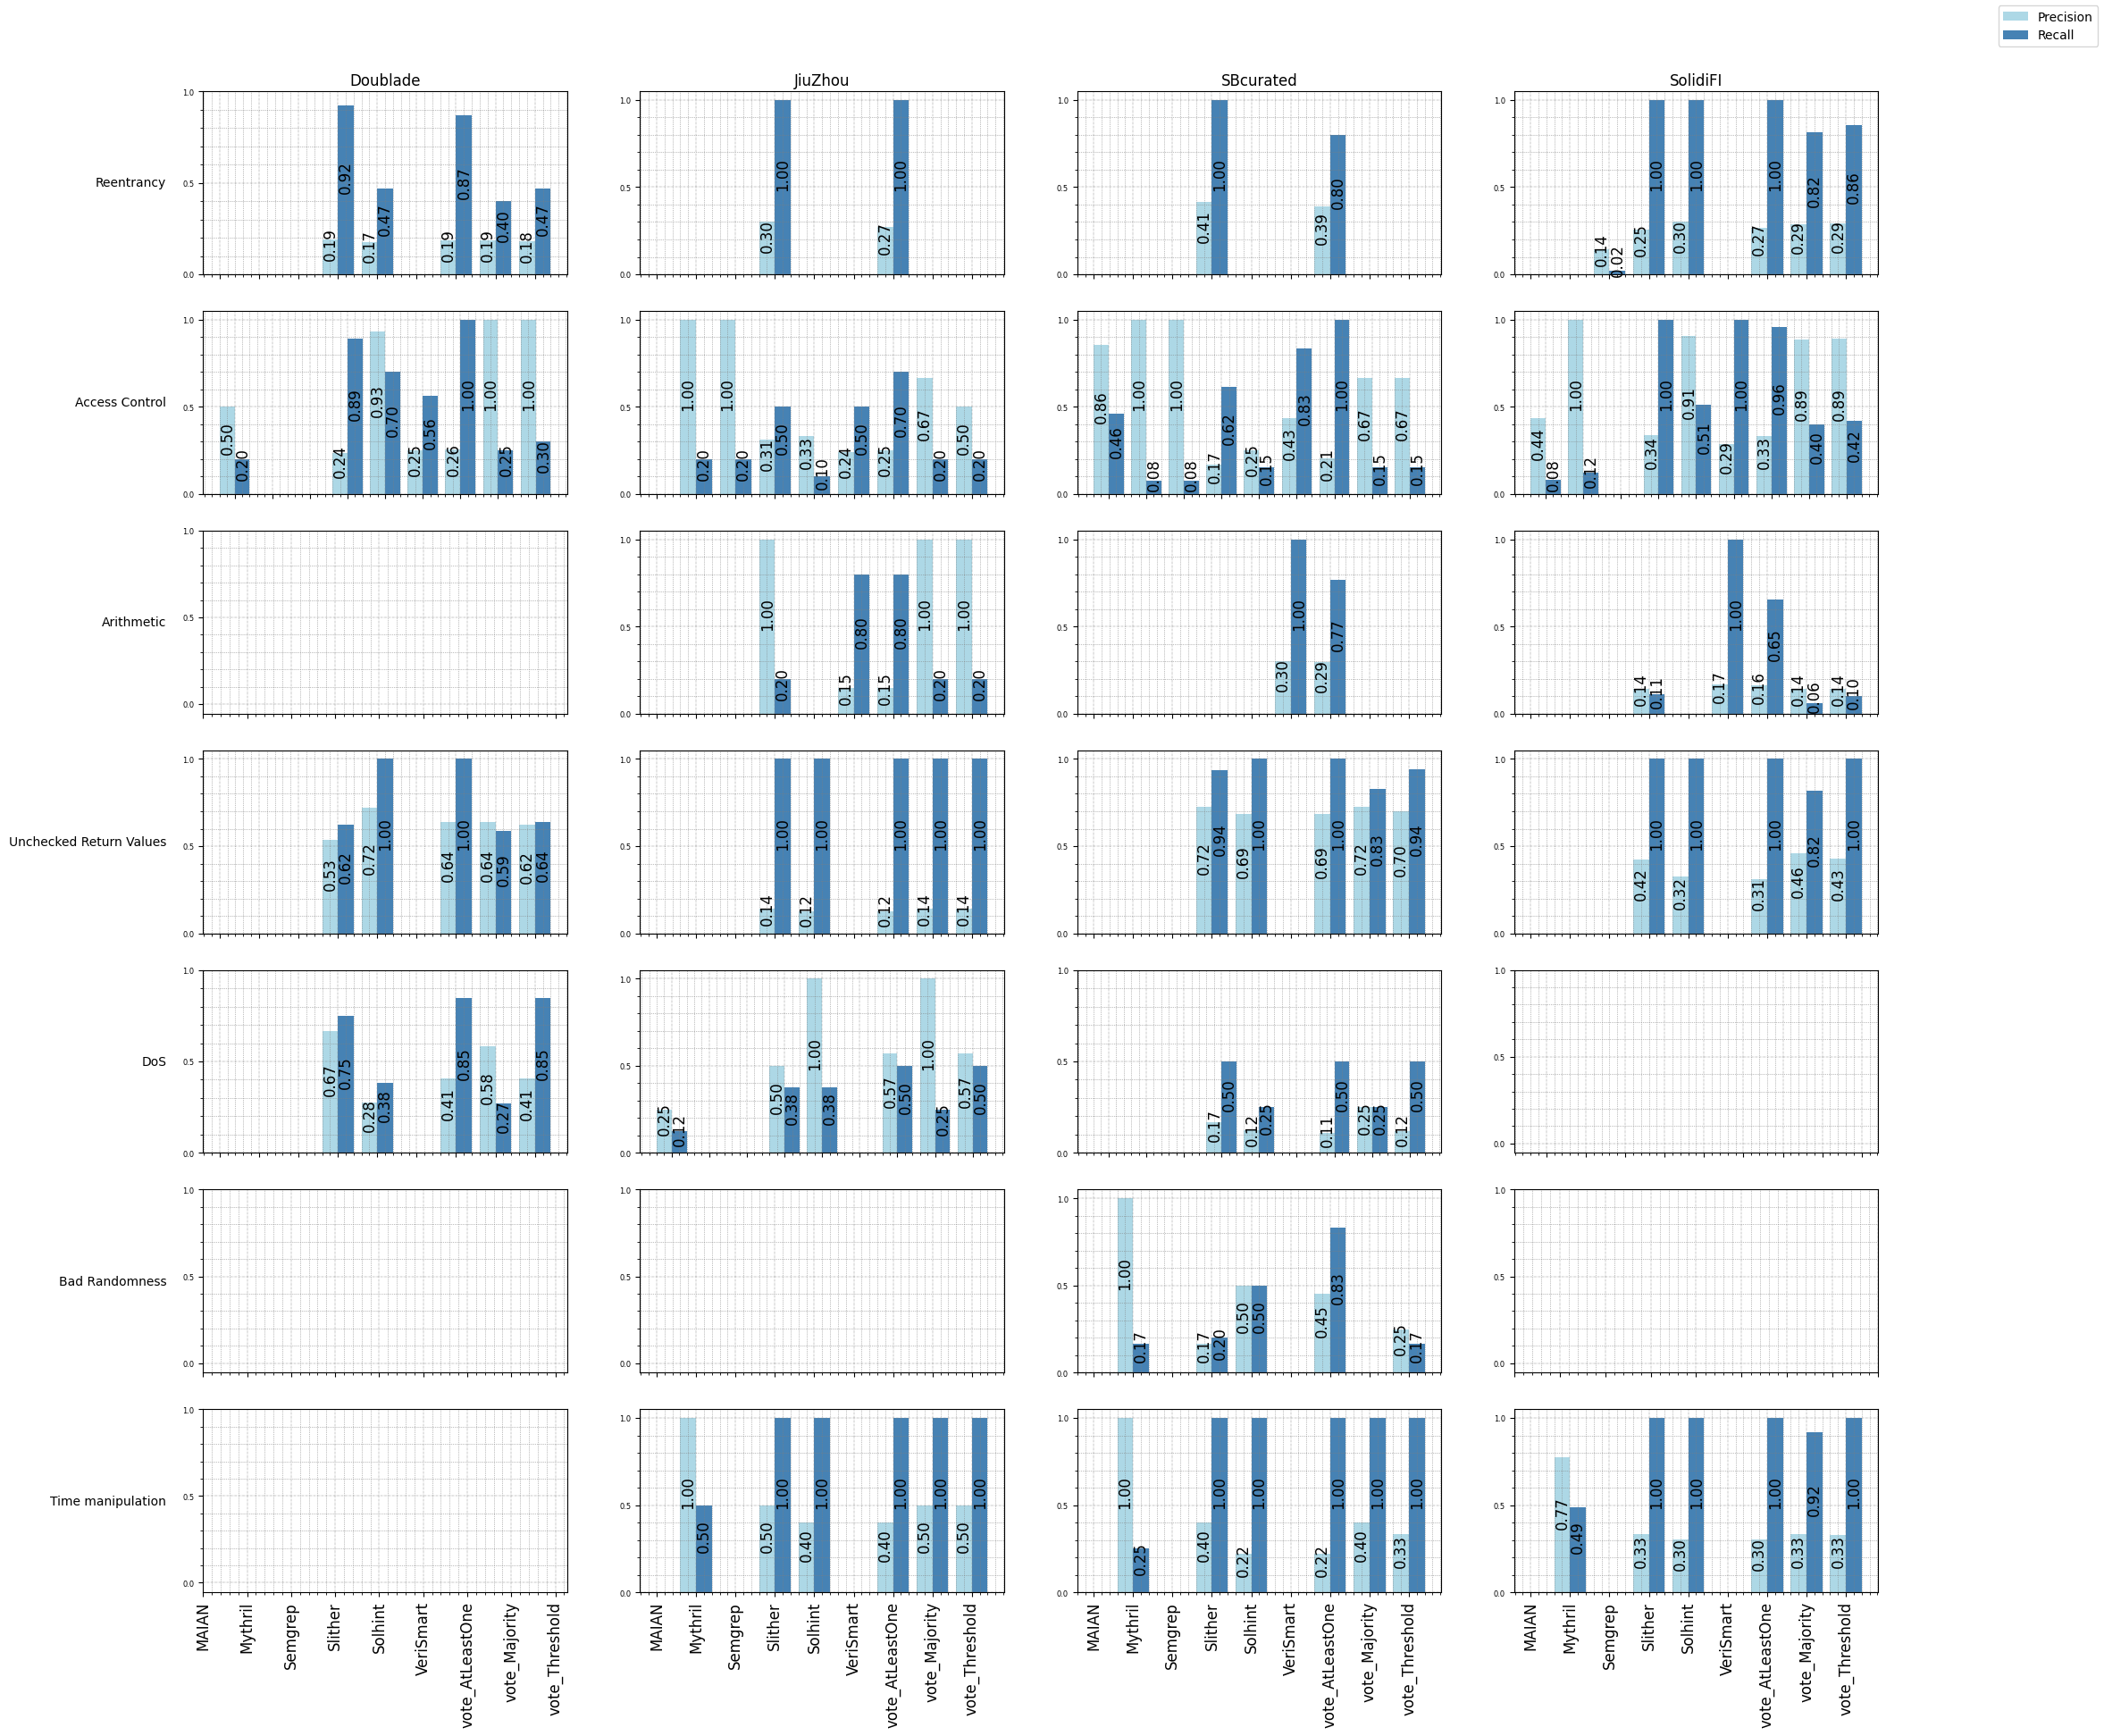

,Base,Label,In Base,Detectable By MAIAN,MAIAN_Recall,MAIAN_Precision,Detectable By Mythril,Mythril_Recall,Mythril_Precision,Detectable By Semgrep,...,VeriSmart_Precision,Detectable By vote_AtLeastOne,vote_AtLeastOne_Recall,vote_AtLeastOne_Precision,Detectable By vote_Majority,vote_Majority_Recall,vote_Majority_Precision,Detectable By vote_Threshold,vote_Threshold_Recall,vote_Threshold_Precision
0,Doublade,Reentrancy,True,False,0.0,NaN,True,0.0,NaN,True,...,NaN,True,0.866667,0.185714,True,0.4,0.1875,True,0.466667,0.179487
1,Doublade,Access Control,True,True,0.2,0.5,True,0.0,NaN,True,...,0.25,True,1.0,0.25641,True,0.25,1.0,True,0.3,1.0
2,Doublade,Arithmetic,False,False,NaN,NaN,True,NaN,NaN,True,...,0.0,True,NaN,0.0,True,NaN,0.0,True,NaN,0.0
3,Doublade,Unchecked Return Values,True,False,0.0,NaN,True,0.0,NaN,False,...,NaN,True,1.0,0.639344,True,0.589744,0.638889,True,0.641026,0.625
4,Doublade,DoS,True,True,0.0,NaN,True,0.0,NaN,False,...,NaN,True,0.846154,0.407407,True,0.269231,0.583333,True,0.846154,0.407407
5,Doublade,Bad Randomness,False,False,NaN,NaN,True,NaN,NaN,True,...,NaN,True,NaN,0.0,True,NaN,0.0,True,NaN,0.0
6,Doublade,Front-Running,False,False,NaN,NaN,False,NaN,NaN,False,...,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
7,Doublade,Time manipulation,False,False,NaN,NaN,True,NaN,NaN,False,...,NaN,True,NaN,0.0,True,NaN,0.0,True,NaN,0.0
8,Doublade,Short Address Attack,False,False,NaN,NaN,False,NaN,NaN,False,...,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
9,JiuZhou,Reentrancy,True,False,0.0,NaN,True,0.0,NaN,True,...,NaN,True,1.0,0.272727,True,0.0,0.0,True,0.0,0.0


In [4]:
Eval_Results = plot_result(['All'],['SolidiFI','Doublade','JiuZhou','SBcurated'])
Eval_Results.to_csv('./Results/Eval Charts/AllResult_v12.csv',index=False)
Eval_Results

# **7. Tools Overlap**
---

In [3]:
overlapDF = getOverlap(['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart'])

In [5]:
overlapDF

,MAIAN,Mythril,Semgrep,Slither,Solhint,VeriSmart
MAIAN,100.0,0,0,45.145631,19.650655,59.482759
Mythril,0,100.0,5.263158,79.310345,83.443709,36.842105
Semgrep,0,0,100.0,92.307692,53.846154,0
Slither,1.88221,4.502944,23.901979,100.0,60.5224,13.431353
Solhint,2.162422,6.05514,28.105346,83.48281,100.0,11.371237
VeriSmart,5.862362,0.457218,0,44.649934,8.6661,100.0


In [6]:
overlapDF = overlapDF.astype(float)
print(overlapDF.dtypes)

MAIAN        float64
Mythril      float64
Semgrep      float64
Slither      float64
Solhint      float64
VeriSmart    float64
dtype: object


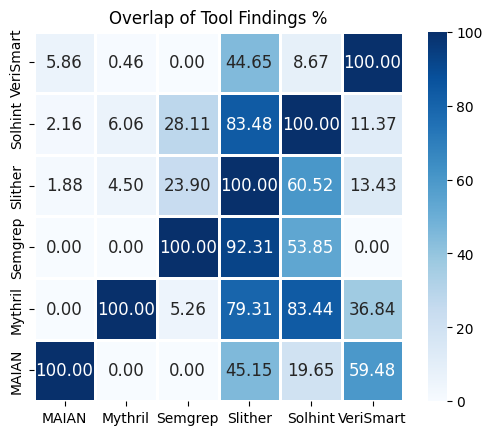

In [10]:
ax = sns.heatmap(overlapDF, annot=True, fmt='.2f',cmap='Blues',vmax=100,vmin=0,linewidths=1,square=True,annot_kws={'size': 12})
plt.title("Overlap of Tool Findings %")
ax.invert_yaxis()
plt.show()

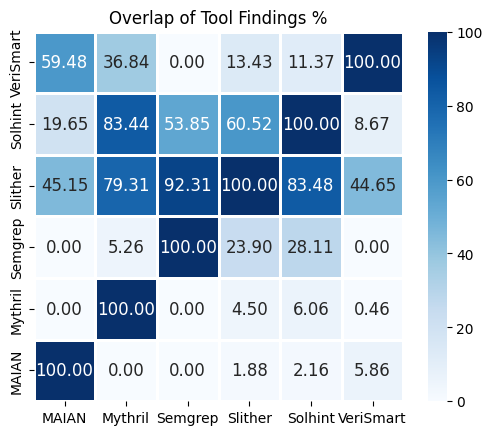

In [11]:
ax = sns.heatmap(overlapDF.T, annot=True, fmt='.2f',cmap='Blues',vmax=100,vmin=0,linewidths=2,square=True,annot_kws={'size': 12})
plt.title("Overlap of Tool Findings %")
ax.invert_yaxis()
plt.show()